In [1]:
import os
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dmt.tk.plotting.shapes import Circle, Arc, PolarPoint
from dmt.tk.plotting.charts.network import CircularNetworkChart

In [2]:
N = 6
mtypes = ["L23_MC", "L5_TPC:A", "L6_UPC", "L23_BC", "L1_SBC", "L4_TPC"][:N]
sclasses = pd.Series(
    ["INH", "EXC", "EXC", "INH", "INH", "EXC"][:N],
    index=mtypes, name="sclass")
pathways = [
    (pre_mtype, post_mtype)
    for pre_mtype in mtypes
    for post_mtype in mtypes]
N = len(pathways)
pathway_strength = pd.DataFrame(
    {("pathway_strength", "mean"): np.random.uniform(size=N),
     ("pathway_strength", "std"):  np.random.uniform(size=N)},
    index=pd.MultiIndex.from_tuples(
        pathways,
        names=["pre_mtype", "post_mtype"]))
def get_node_weights(dataframe):
    weights = dataframe.groupby("pre_mtype").agg("sum")[("pathway_strength", "mean")]
    weights.index.name = "label"
    weights.name = "weight"
    return weights/np.sum(weights)

link_weights = pd.Series(
    pathway_strength[("pathway_strength", "mean")].values,
    index = pathway_strength.index.rename(["begin_node", "end_node"]),
    name="weight")

In [3]:
layer_cols = {'L1': np.array([0.3, 0.3, 0]),
              'L2': np.array([0.0, 0.3, 0.3]),
              'L3': np.array([0.15, 0.3, 0.15]),
              'L4': np.array([0.3, 0.0, 0.3]),
              'L5': np.array([0.0, 0.6, 0.0]),
              'L6': np.array([0.1, 0.1, 0.4])}
layer_cols["L23"] = (layer_cols["L2"] + layer_cols["L3"]) / 2.

default = np.array([0.2, 0.2, 0.2])
add_ei = {'EXC': np.array([0.5, 0.0, 0.0]),
          'INH': np.array([0.0, 0.0, 0.5])}


def _get_color(mtype, sclass):
    layer = mtype.split('_')[0]
    return np.minimum(
        layer_cols[layer]
            + add_ei[sclass] 
            + np.random.rand(3) * 0.25, 1.0)
def make_col_dict(mtypes):
    return dict([(_m[0], numpy.minimum(layer_cols.setdefault(_m[0][1], default)
                                       + add_ei[_m[1]] +
                                       numpy.random.rand(3) * 0.25, 1.0))
                 for _m in mtypes])

In [4]:
mtypes = link_weights.index.get_level_values("begin_node").unique()
color_map ={
    mtype: _get_color(mtype, sclass)
    for mtype, sclass in sclasses.items()}
for pre in mtypes:
    for post in mtypes:
        link_color = list(color_map[pre])
        link_color.append(0.25)
        color_map[(pre, post)] = np.array([0.8, 0.8, 0.8, 1.0]) * link_color
chart =\
    CircularNetworkChart(
        link_data=link_weights,
        color_map=color_map)

1.0


<Figure size 1008x1008 with 0 Axes>

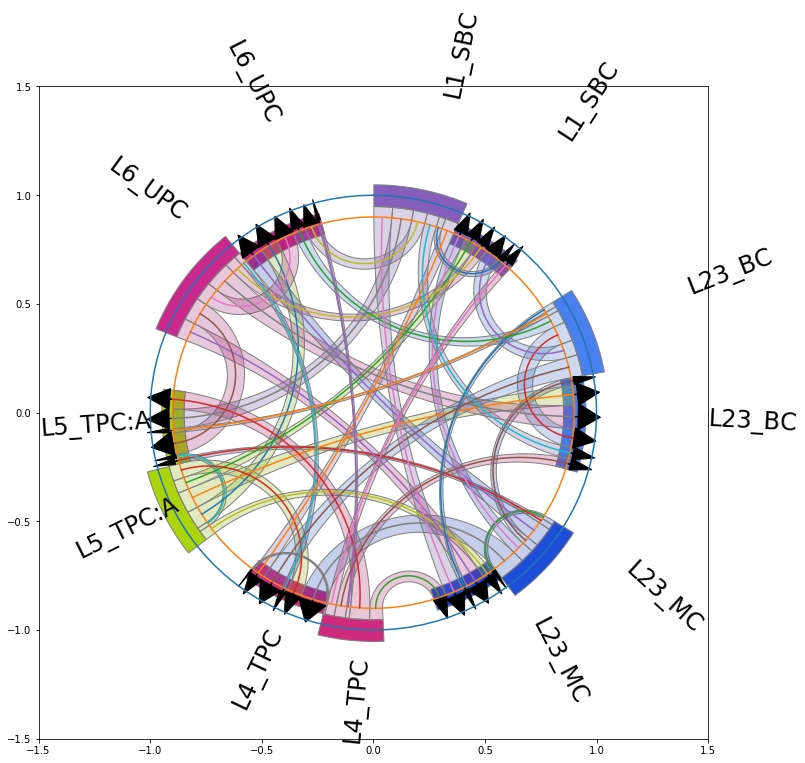

In [5]:
figure = plt.figure(figsize=(14, 14))
print(chart.outer_circle.radius)
chart.draw(draw_diagonal=True)

In [ ]:
figure = plt.figure(figsize=(12, 12))
chart.draw(draw_diagonal=False)

In [ ]:
l23_mc_to_l23_mc = chart.flow_geometries[("L23_MC", "L23_MC")]

In [ ]:
arc_begin =\
    chart.get_flow_position(
        l23_mc_to_l23_mc.begin_node,
        l23_mc_to_l23_mc)
begin_base = chart.arc(
    l23_mc_to_l23_mc.begin_node.shape.radial[0],
    arc_begin[0], arc_begin[1]
)
begin_base[np.int32(len(begin_base)/2)]

In [ ]:
np.vstack([
    begin_base[np.int32(len(begin_base)/2)],
    l23_mc_to_l23_mc.curve.vertices[0:5]])

In [ ]:
print(l23_mc_to_l23_mc.chart.get_color(l23_mc_to_l23_mc))
l23_mc_to_l23_mc.facecolor

    Fancy arrows

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

x_tail = 0.1
y_tail = 0.1
x_head = 0.9
y_head = 0.9
dx = x_head - x_tail
dy = y_head - y_tail

fig, axs = plt.subplots(nrows=2)
arrow = mpatches.FancyArrowPatch(
    (x_tail, y_tail),
    (dx, dy),
    mutation_scale=100
)
axs[0].add_patch(arrow)

arrow = mpatches.FancyArrowPatch(
    (x_tail, y_tail),
    (dx, dy),
    mutation_scale=100
)
axs[1].add_patch(arrow)
axs[1].set_xlim(0,2)
axs[1].set_ylim(0,2)